# *FLORES ESTOPIER RODRIGO*

In [4]:
import ipywidgets as widgets

def create_button():
  button = widgets.Button(
    description='Next Generation',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Next Generation',
    icon='check' # (FontAwesome names without the `fa-` prefix)
  )
  return button

import random
import matplotlib.pyplot as plt
import numpy as np
from IPython import display as display

from functools import cmp_to_key
#Chromosomes de 32 bits de longitud
L_chromosome=32    #16 bits para x ,16 bits para y
N_chains=2**(L_chromosome//2)
#Limites del espacio de busqueda
a=-5
b=5
crossover_point= L_chromosome//2


def random_chromosome():
    chromosome=[]
    for i in range(0,L_chromosome):
        if random.random()<0.5:
            chromosome.append(0)
        else:
            chromosome.append(1)

    return chromosome

#Number of chromosomes
N_chromosomes=10
#probability of mutation
prob_m=0.75

#Creamos la poblacion inicial
F0=[]
fitness_values=[]

for i in range(0,N_chromosomes):
    F0.append(random_chromosome())
    fitness_values.append(0)

#binary codification
def decode_chromosome(chromosome):
    global L_chromosome,N_chains,a,b
    half_length=L_chromosome//2
    value=0
    # Decodificamos la primera mitad para x
    value_x = sum((2**p) * chromosome[-1-p] for p in range(half_length))
    x = a + (b - a) * float(value_x) / (N_chains - 1)

    # Decodificamos la segunda mitad para y
    value_y = sum((2**p) * chromosome[half_length-1-p] for p in range(half_length))
    y = a + (b - a) * float(value_y) / (N_chains - 1)

    return x, y



def ackley(x,y):
    return -20*np.exp(-0.2*np.sqrt(0.5*(x*x+y*y)))-np.exp(0.5*(np.cos(2*np.pi*x)+np.cos(2*np.pi*y)))+np.e+20



def evaluate_chromosomes():
    global F0,fitness_values

    for p in range(N_chromosomes):
        x,y=decode_chromosome(F0[p])
        fitness_values[p]=ackley(x,y)


def compare_chromosomes(chromosome1,chromosome2):
    x1, y1 = decode_chromosome(chromosome1)
    x2, y2 = decode_chromosome(chromosome2)

    fvc1=ackley(x1,y1)
    fvc2=ackley(x2,y2)
    if fvc1 > fvc2:
        return 1
    elif fvc1 == fvc2:
        return 0
    else: #fvg1<fvg2
        return -1





def create_wheel():
    global F0,fitness_values
    Lwheel=N_chromosomes*10
    maxv=max(fitness_values)
    acc=0
    for p in range(N_chromosomes):
        acc+=maxv-fitness_values[p]
    fraction=[]
    for p in range(N_chromosomes):
        fraction.append( float(maxv-fitness_values[p])/acc)
        if fraction[-1]<=1.0/Lwheel:
            fraction[-1]=1.0/Lwheel
    #print(fraction)
    fraction[0]-=(sum(fraction)-1.0)/2
    fraction[1]-=(sum(fraction)-1.0)/2
    #print(fraction)

    wheel=[]

    pc=0

    for f in fraction:
        Np=int(f*Lwheel)
        for i in range(Np):
            wheel.append(pc)
        pc+=1

    return wheel

F1=F0[:]
n=0
def nextgeneration(b):
    global F0, F1, n
    display.clear_output(wait=True)
    #display.display(button)

    # Sort the population by fitness
    F0.sort(key=cmp_to_key(compare_chromosomes))

    print( "Best solution so far:")
    xx,yy = decode_chromosome(F0[0])
    n +=1
    print("Generation: ", n)
    print("f",decode_chromosome(F0[0]),"= ", ackley(xx,yy) )

    # Elitism: Keep the two best chromosomes
    F1[0] = F0[0]
    F1[1] = F0[1]

    # Create the rest of the new generation
    roulette = create_wheel()
    print(roulette)
    for i in range(0,int((N_chromosomes-2)/2)):
        #Seleccionamos dos padres
        p1 = random.choice(roulette)
        p2 = random.choice(roulette)

        # Generamos dos descendientes mediante crossover
        o1 = F0[p1][:crossover_point] + F0[p2][crossover_point:]
        o2 = F0[p2][:crossover_point] + F0[p1][crossover_point:]

        # Mutacion
        if random.random() < prob_m:
            o1[random.randint(0, L_chromosome - 1)] ^= 1
        if random.random() < prob_m:
            o2[random.randint(0, L_chromosome - 1)] ^= 1

        #Agregamos los descendientes a la siguiente generacion F1
        F1[2+2*i]=o1
        F1[3+2*i]=o2

    # Remplazamos la generacion
    F0[:] = F1[:]

    # Graph the current population
    #graph_population(F1)





def graph_f():
    global a,b
    xini=a
    xfin=b
    x=np.linspace(xini,xfin,500)
    y=np.linspace(xini,xfin,500)
    X,Y=np.meshgrid(x,y)
    Z=ackley(X,Y)
    plt.contourf(X,Y,Z,cmap='viridis')
    plt.colorbar()

def graph_population(F):
    x_population = []
    y_population = []

    for chromosome in F:
        x, y = decode_chromosome(chromosome)
        x_population.append(x)
        y_population.append(y)
    graph_f()
    plt.scatter(x_population, y_population, color='red', label='Population')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Population Visualization')
    plt.legend()
    plt.show()



button=create_button()
button.on_click(nextgeneration)
display.display(button)

evaluate_chromosomes()
graph_population(F0)

Best solution so far:
Generation:  1
f (0.9938963912413215, -0.008468757152666484) =  2.6255477858240326
[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9]


Best solution so far:
Generation:  151
f (7.629510948348184e-05, -7.629510948348184e-05) =  0.00030549044236494183
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]


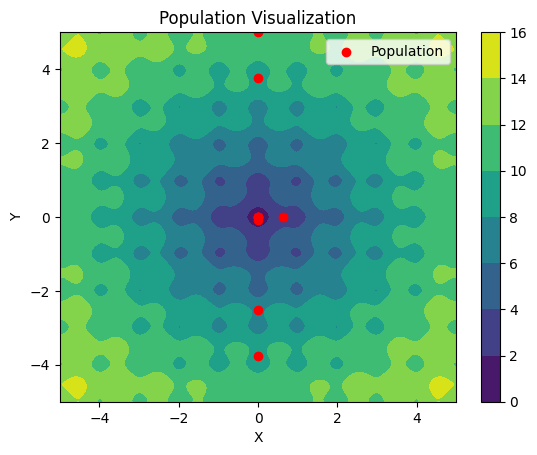

In [5]:
for generaciones in range(150):
    nextgeneration(None)
    evaluate_chromosomes()

#Graficar la ultima generacion
graph_population(F0)

